# T cells mapped to T2T version 2.0
# Day 6 post EP for CRISPoff and unedited
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Date: Aug. 25, 2025
Modify the window of the input size

Save subsets of reads

In [1]:

import sys
from pathlib import Path
from datetime import datetime

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated,
    subset_BAM_by_read_IDs,
    bam_to_sam,
    plot_bam_quality_metrics
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

from funcs_check_quality_bams import get_read_info_by_index, get_read_info_by_name

modkit found with expected version 0.2.4


In [2]:
system_info()
date_today = datetime.today().strftime('%Y-%m-%d')
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta')
reg_genome_version = "t2t_v2_0"
region_chr = 'chr1'

# 6500bps: EXACT cutting region  
# chr1:206,583,334-206,589,873
region_start = 206583334    + 20
region_end = 206589874      - 20 
# CD55 TSS start: chr1:206586828-206606065 (+)
# (before TSS: 3474, after TSS: 3026 bps)

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_path, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}') 

System: Linux
Release: 6.8.0-60-generic
Version: #63~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Tue Apr 22 19:00:15 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTA

# Look at Cas9 T cells at day 6 post EP  



In [3]:
# folder_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v2_0/"
# bam_name = "chr1_206560169_206614236.sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# unedit_bam_path = folder_path + bam_name


# unedit_bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

#  "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_UNEDITED_Day28/merged_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_nCATs_Tcells_UNEDITED_Day28_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# day 6:  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# unedit_bam_path

In [4]:
day_num = 28
day_num

28

In [5]:
output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output'
# '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/output/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
output_dir_path


'/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output'

In [6]:
original_bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

original_bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

experiment_name =  day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2
Region length: 6500
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.995 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in up_chm13v2.0.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowc…

          |    0%

          | Transferring 28 from reads.CG,0.txt into reads.combined_basemods.h5, new size 28   0% | 00:00<?

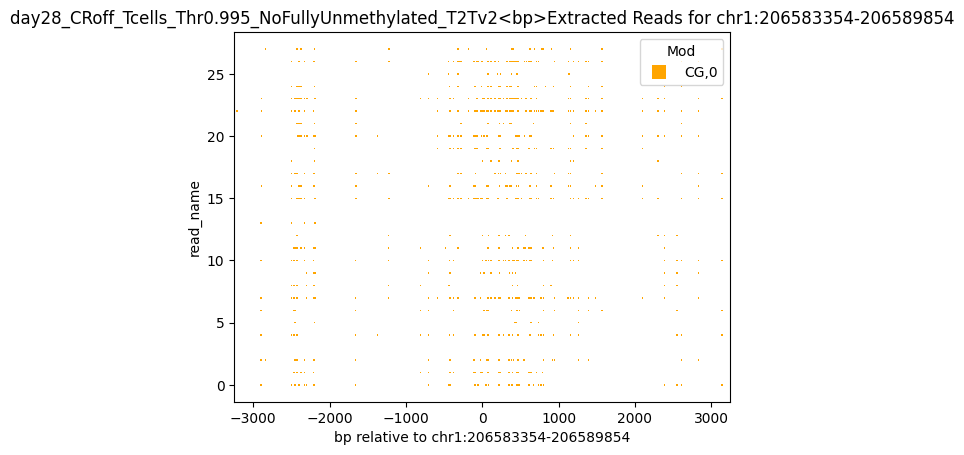

Found read coordinates: 28 reads
Unique read names with methylation: 26
Found 13 reads with full coverage
Reads with methylation data: 26
Overlap between full coverage and methylation: 13
After full coverage filtering: 13 reads with methylation data
Final result: 469 reads with methylation information out of 28 total reads


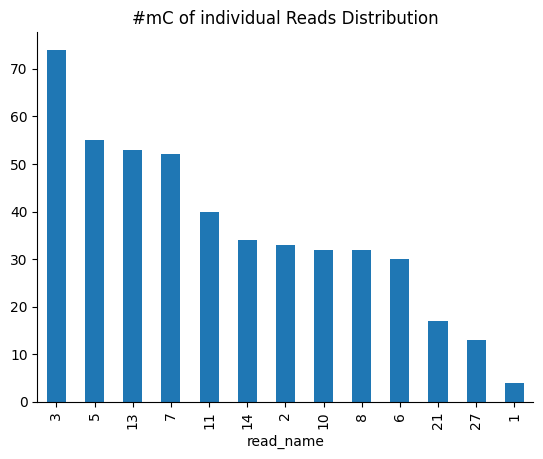

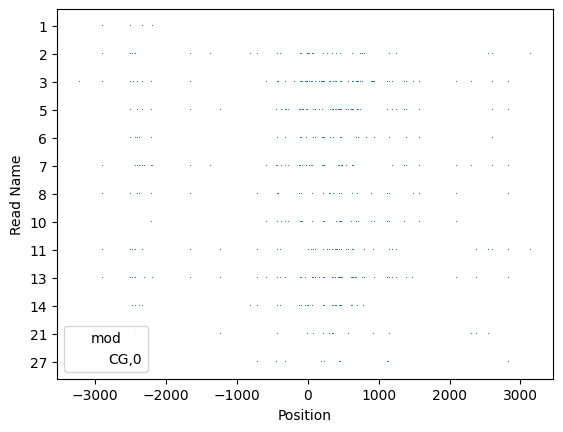

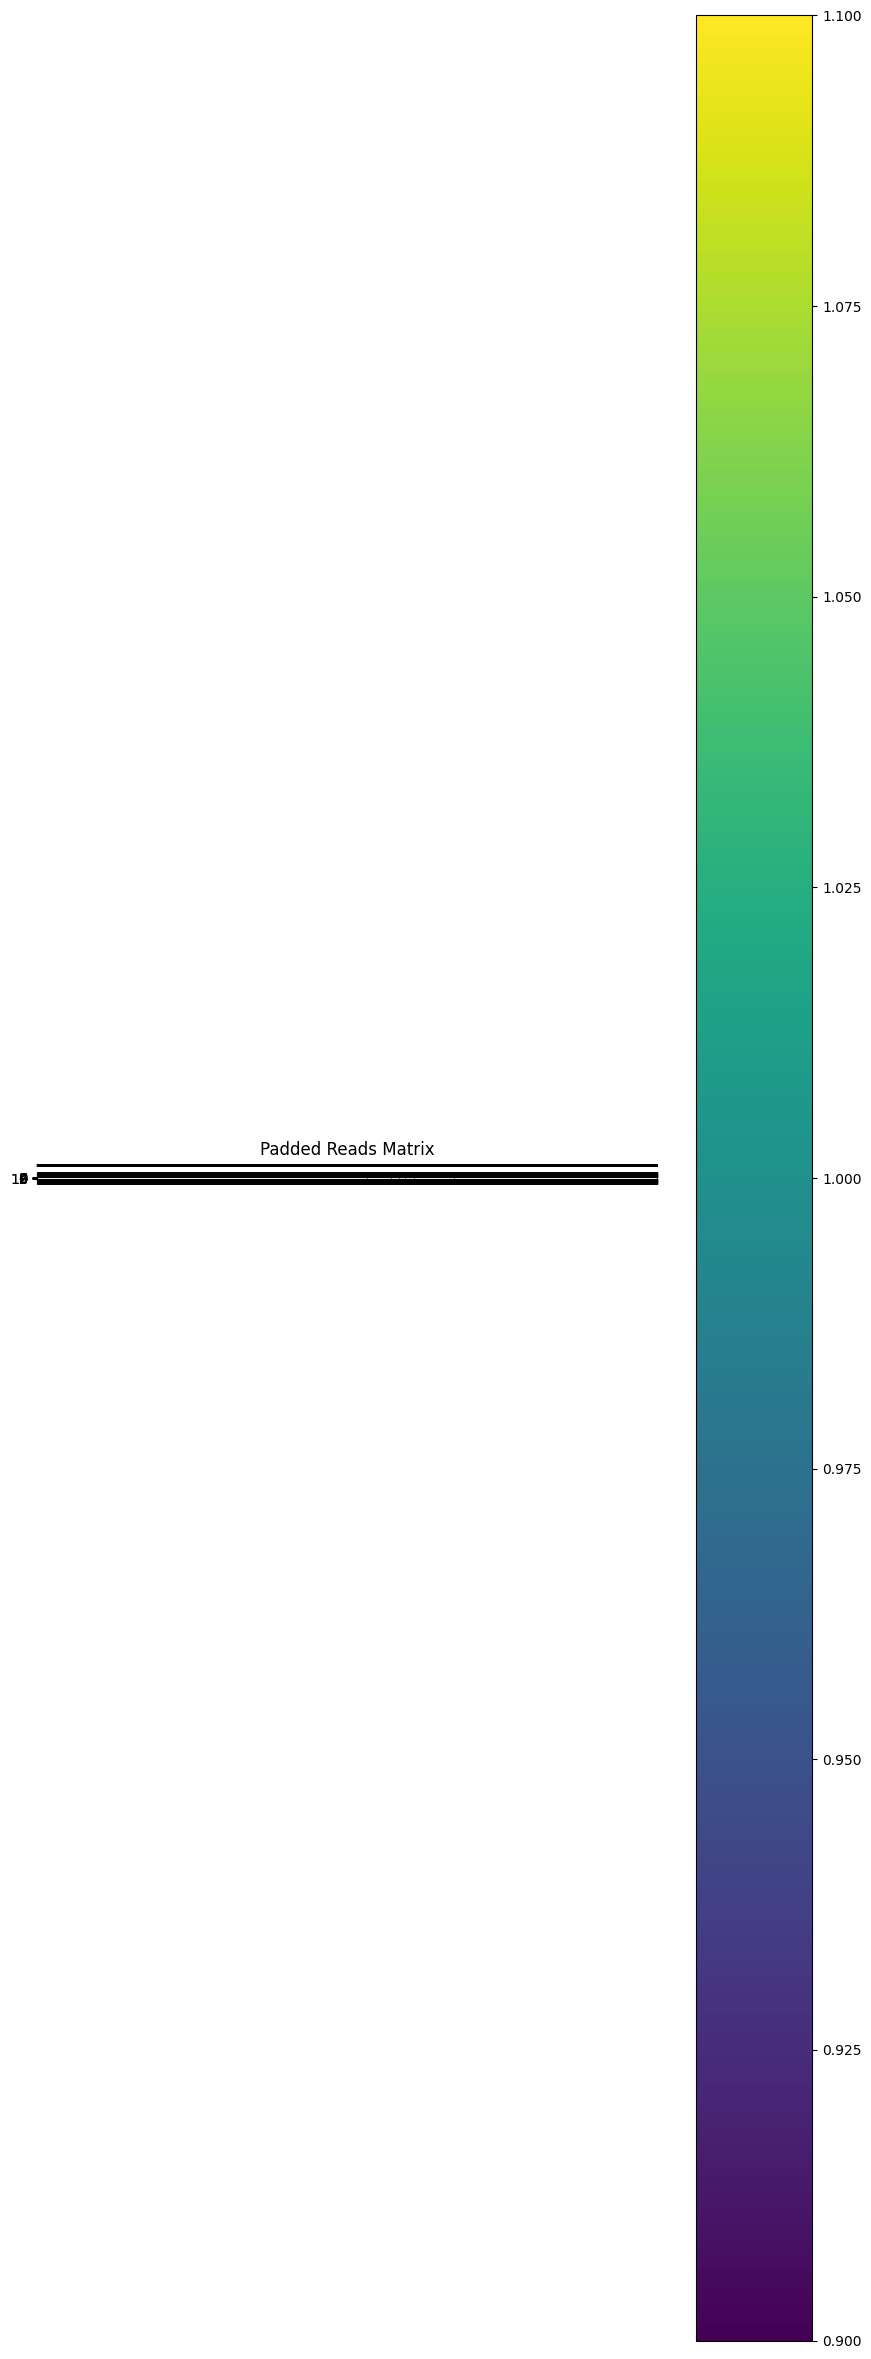

Padded reads saved to padded_reads_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-25.npy
Padded reads loaded successfully.


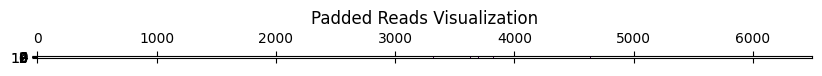

Visualization completed.
Region length: 6500
GTCATTGTATGGTTCCTGGGATAAGAGTAAGAACCGTGGTCCCTTGCTCTGTCAAAATCATAAACCTATTTTCTTTGTATTTTGACTTAATTACATAAGCTTGTTTTGGATTGGAAGGTCTATAGAGACTATTTTAGTGCCAAATGCTATTTAATCAATGCAGAAATAAGCCCTTGAGAGGTGCAGTGACTCAGCTGAGGACACACTGATAGTTTCTGGTAGATAAGTATGAAGCCTTGGAACTACTTCTCATATCATAAGCCCCTGGGTTCCCAAATCACCTCCCCAAGTACCTAATTCATCATCCTCTGCATACAAGAAATTTTTGCTCATTCCAATAAAAAGAATGTAGTACGGCAGGACAGGAGAAGTACAGGTTTTGGAATCAAACTAGGTTTAGATTCTGACCTGGTCGCTAGTTAGTGCATGGGCTTTGGTAAACAGCCTCTCAGCCTGTTTCCTTGTCTGCAAAATATGGATAGTTATCTTCACTTCATGAAGTTGTGTTGGTGAAATGGTATAATGTGTATAAAGCAACTGGAACACAACAAATGAGGCCATTTATTTAAAATAATCTTTAGTAAGTTATAAATTCACATATTTGCTTTTTTCTGAGGAATGCTTAGATTTTATCATAGATCTCTTTTCTAAATTGAGTAAATACATAGTGGATTTCTTTGTTTCCTTCCCCTCAGAATGTTGAAATTTGGCTGATTGTAACTATTACTTAAGACTCTATCCAGTAATTGTTCGTAAAATTTCTTTTCTTTTTTTTTTTTTGAGACGGAGTTTTGCTCTCGTCCCCCAGGCTGGAGTGCAATGGCGCGATCTTGGCTCACTGCAACCTCCGCCTCCCAGGTTCAAGTGATTCTCCCGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCACAACGCCCAGCCAATTTTTGTATTTTTAGTAGAGACGGG

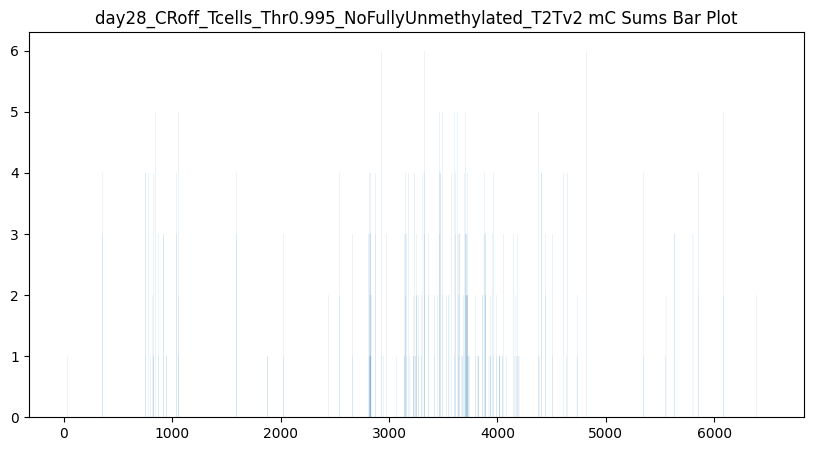

(mC_sums / len(CGs_all) = [0. 0. 0. ... 0. 0. 0.]


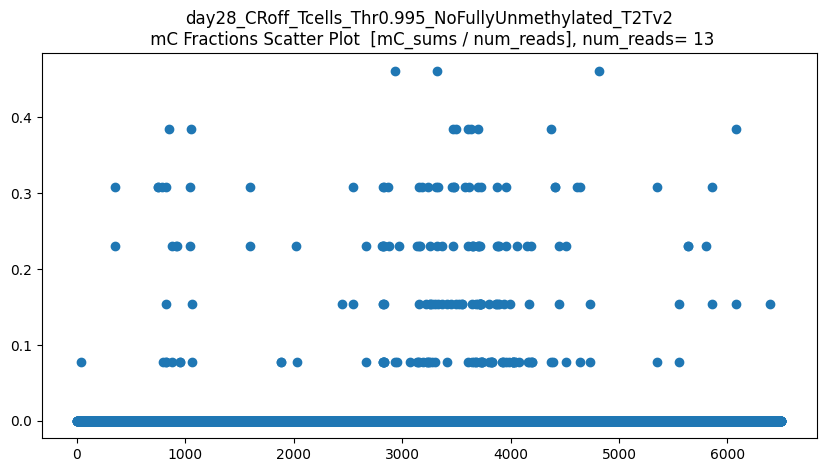

len(CGs_all) = 13
CGs_all.shape = (13, 137)
len(CGs_all_on_fwd_C_sums) = 6500
CGs_all_on_fwd_C_sums.shape = (6500,)


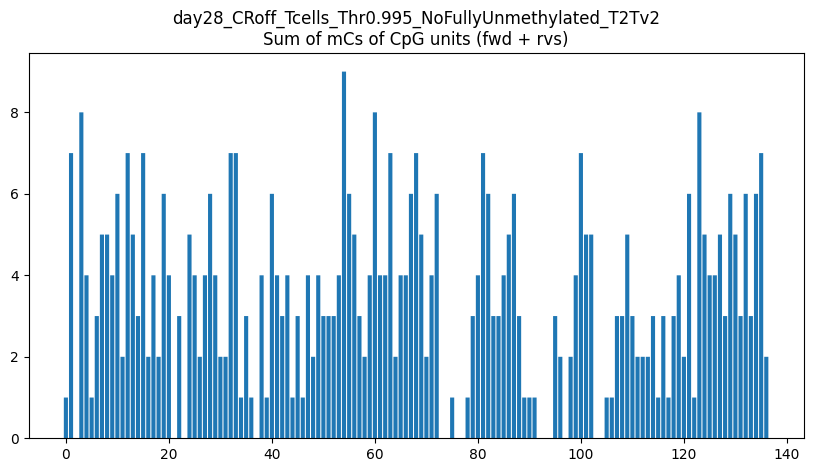

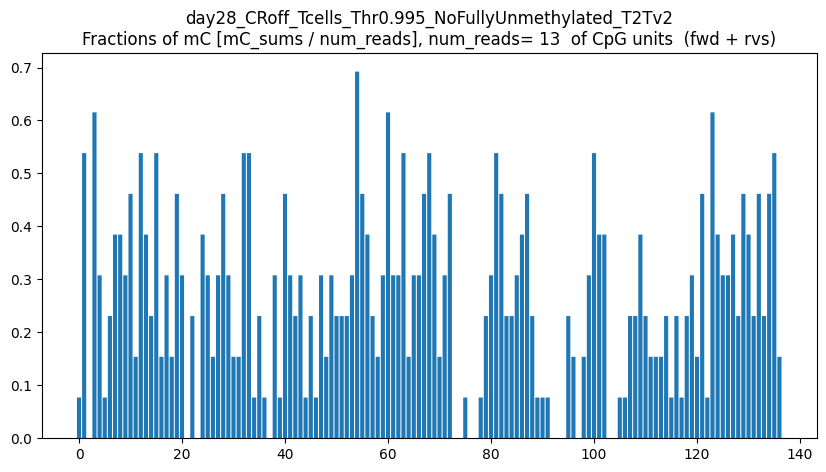

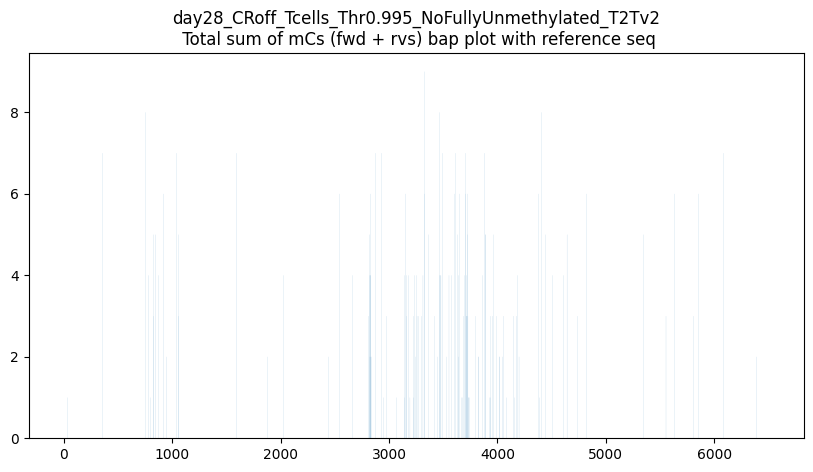

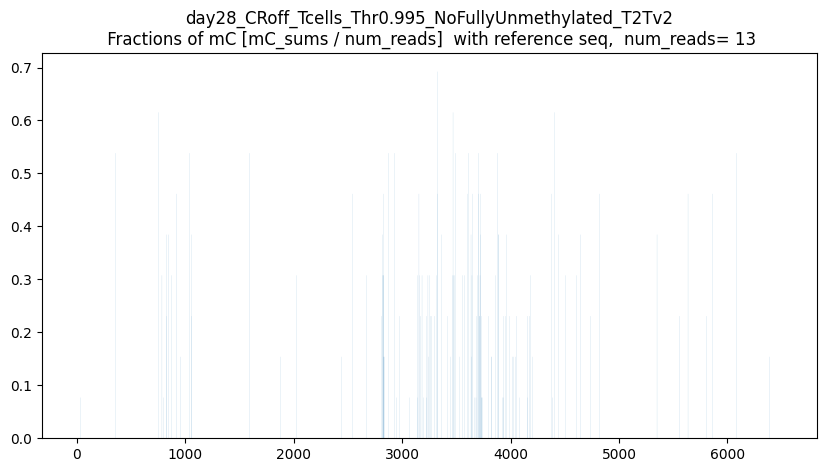

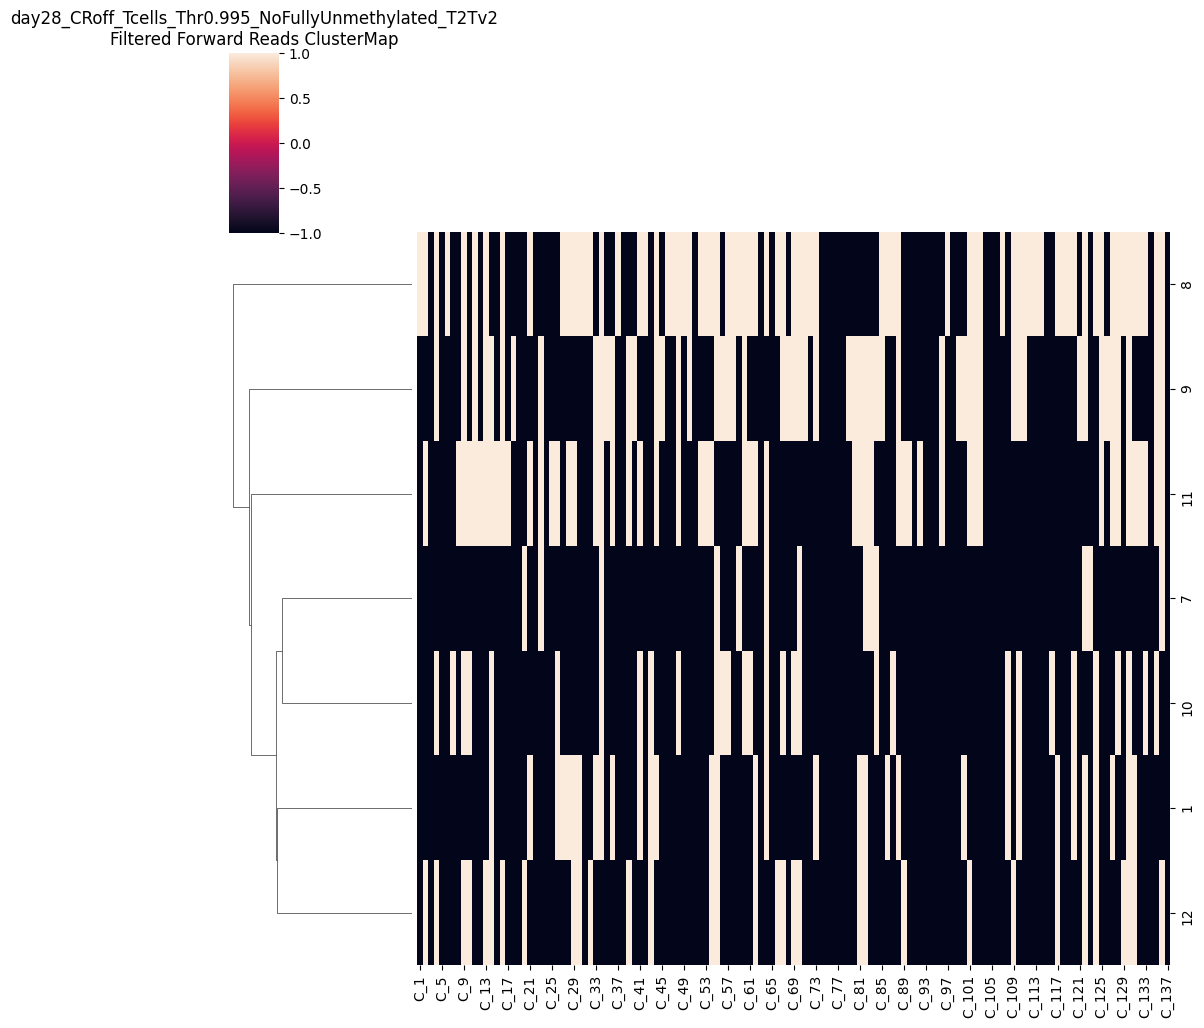

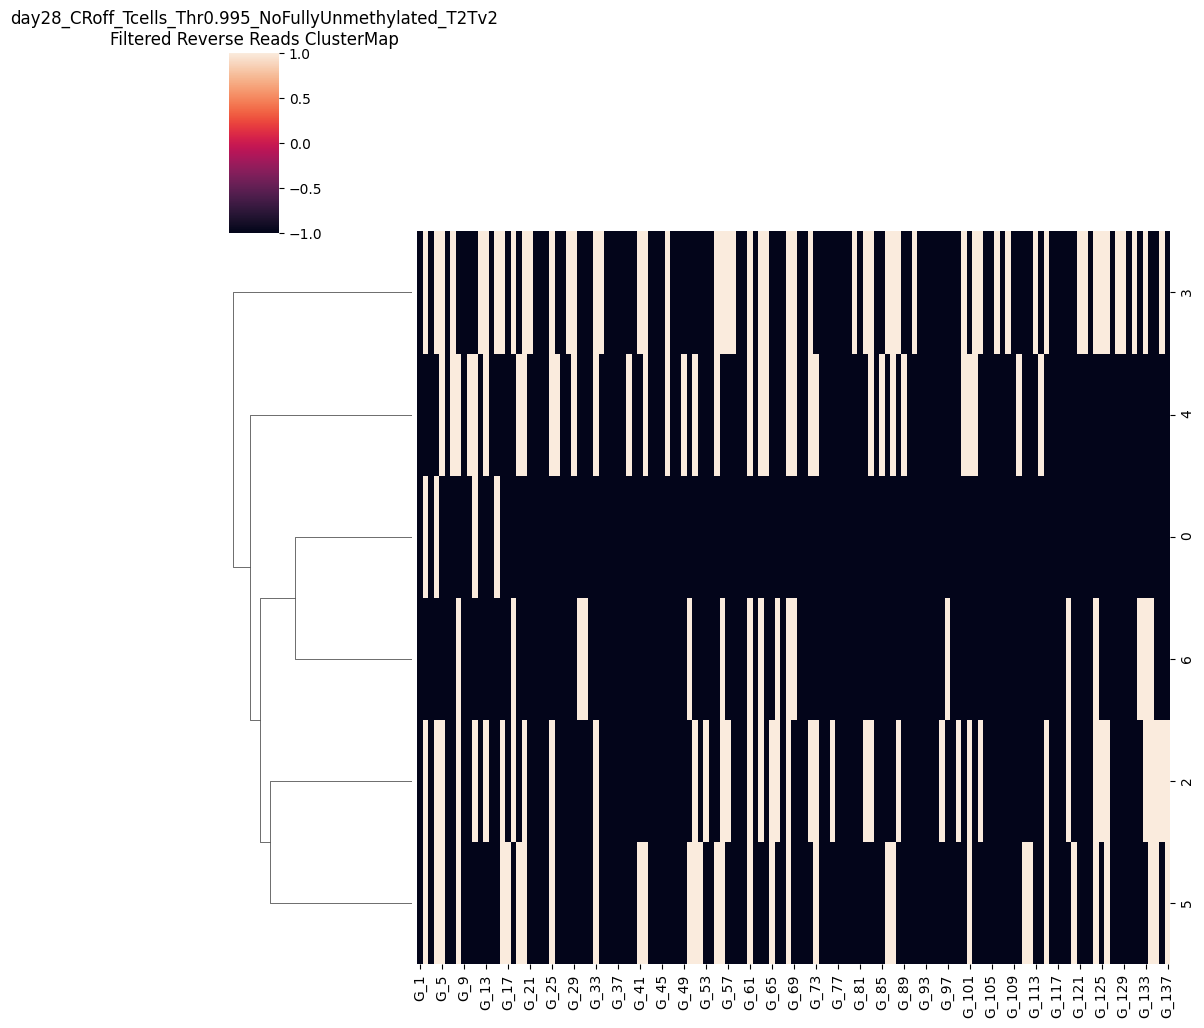

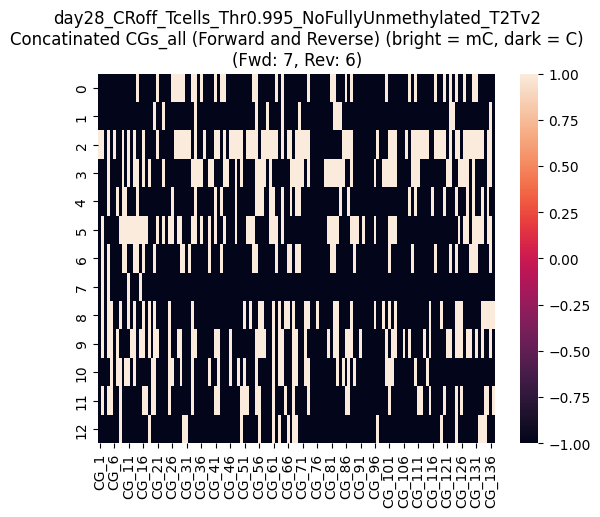

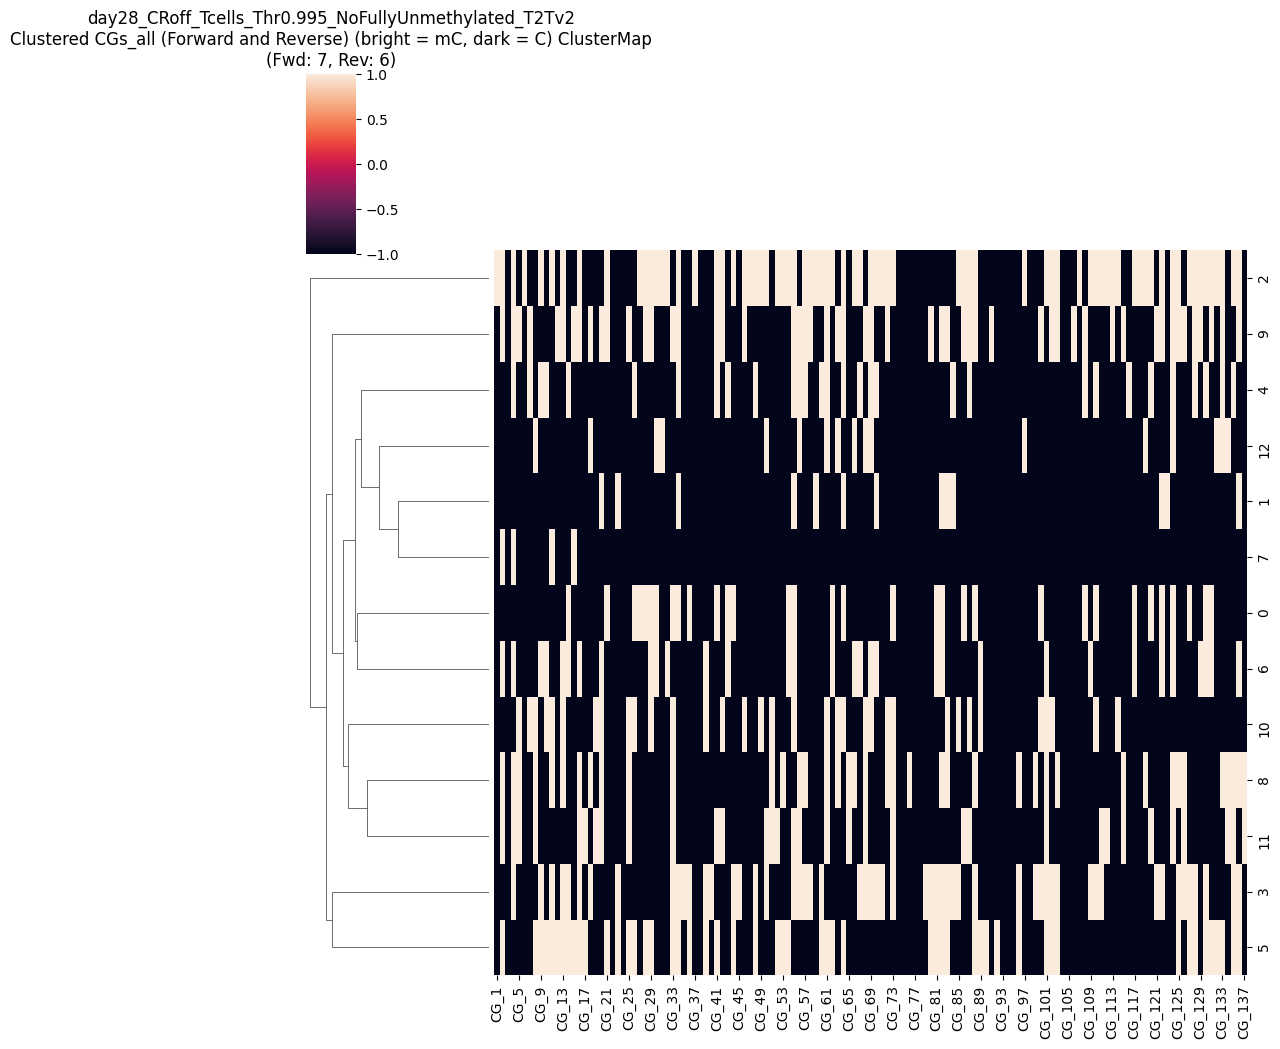

CGs_all saved as CG_137_padded_reads_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-08-25_units_combined_numFWD7_numRVS6.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [8]:
threshold_mC = 0.995 #0.7 #  0.9 #0.99
experiment_name = "day"+str(day_num)+"_CRoff_Tcells_Thr"+str(threshold_mC)+"_NoFullyUnmethylated_T2Tv2"
bam_path = original_bam_path #  unedit_bam_path

print('experiment_name = ', experiment_name)

save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

extract_file, extract_regions = extract_from_bam(
    experiment_name = experiment_name,
    bam_path=bam_path,
    ref_genome_file=ref_genome_path,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)
keep_full_coverage_reads_only=True

if extract_file:
    reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list, 
    keep_full_coverage_reads_only=keep_full_coverage_reads_only)
    visualize_data(reads_df)

    padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# Processing and visualizing CpG units on forward and reverse strands 
try: 

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df, CG_pair_idx, CG_coordinates, CG_info_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_path, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


# Threshold 80%*mean(mC in alll reads)

In [9]:
threshold_percent = 80
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 33.0
Maximum methylated CGs per read: 74.0
Threshold (80% of max): 26.40
Original number of reads: 13
Number of reads after filtering: 10
Removed 3 reads


,read_name_str,read_name,read_id_number,mod,pos,pos_shifted,num_CG_methylated
4,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-2897,353,1.0
5,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-2500,750,1.0
6,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-2467,783,1.0
7,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-2426,824,1.0
8,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-1658,1592,1.0
...,...,...,...,...,...,...,...
555,57b38588-021d-4039-bce7-6a1324d97628,14,14,"CG,0",612,3862,1.0
556,57b38588-021d-4039-bce7-6a1324d97628,14,14,"CG,0",626,3876,1.0
557,57b38588-021d-4039-bce7-6a1324d97628,14,14,"CG,0",637,3887,1.0
558,57b38588-021d-4039-bce7-6a1324d97628,14,14,"CG,0",709,3959,1.0


In [10]:
remove_reads_df

,read_name_str,read_name,read_id_number,mod,pos,pos_shifted,num_CG_methylated
0,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2897,353,1.0
1,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2500,750,1.0
2,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2332,918,1.0
3,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2193,1057,1.0
674,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",-2426,824,1.0
675,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",-1225,2025,1.0
676,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",-421,2829,1.0
677,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",-419,2831,1.0
678,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",3,3253,1.0
679,30258949-6bba-40d0-a628-978b9f04ae14,21,21,"CG,0",79,3329,1.0


In [11]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [12]:
!pwd

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads


In [13]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [14]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

# Save filtered reads to BAM

In [15]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [16]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [17]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_80_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam')

In [18]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

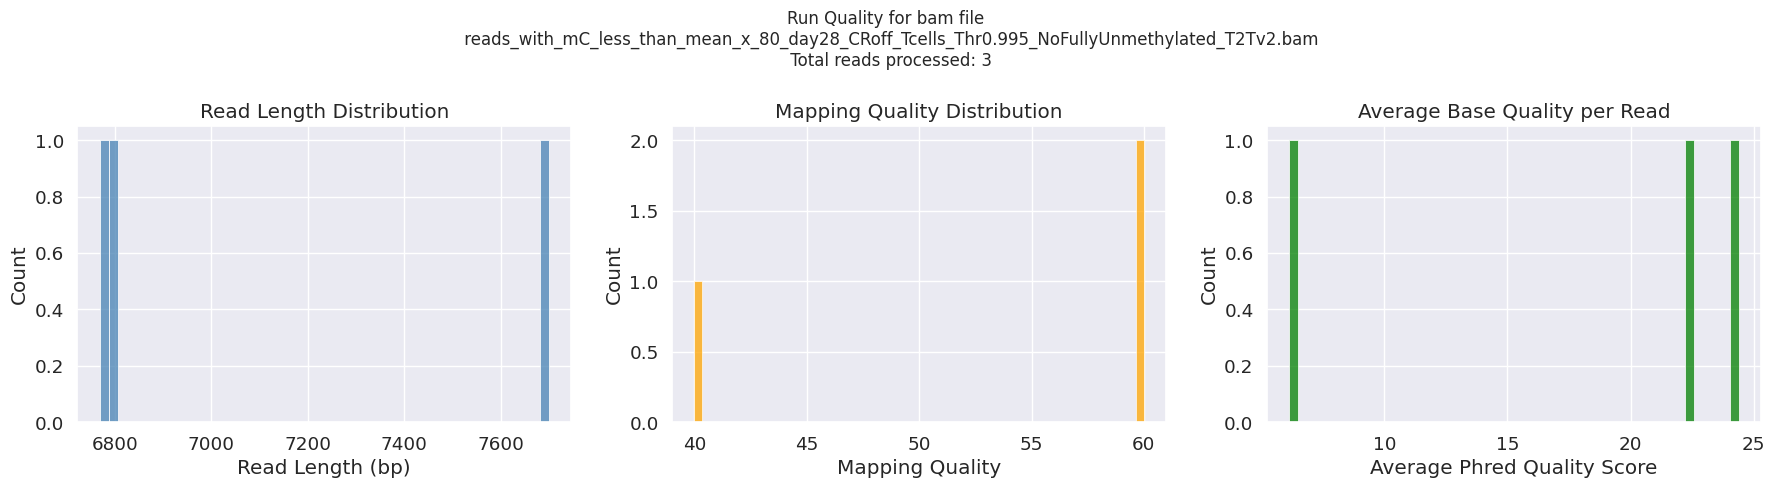

Total reads processed: 3


In [19]:

plot_bam_quality_metrics(removed_output_bam_path)

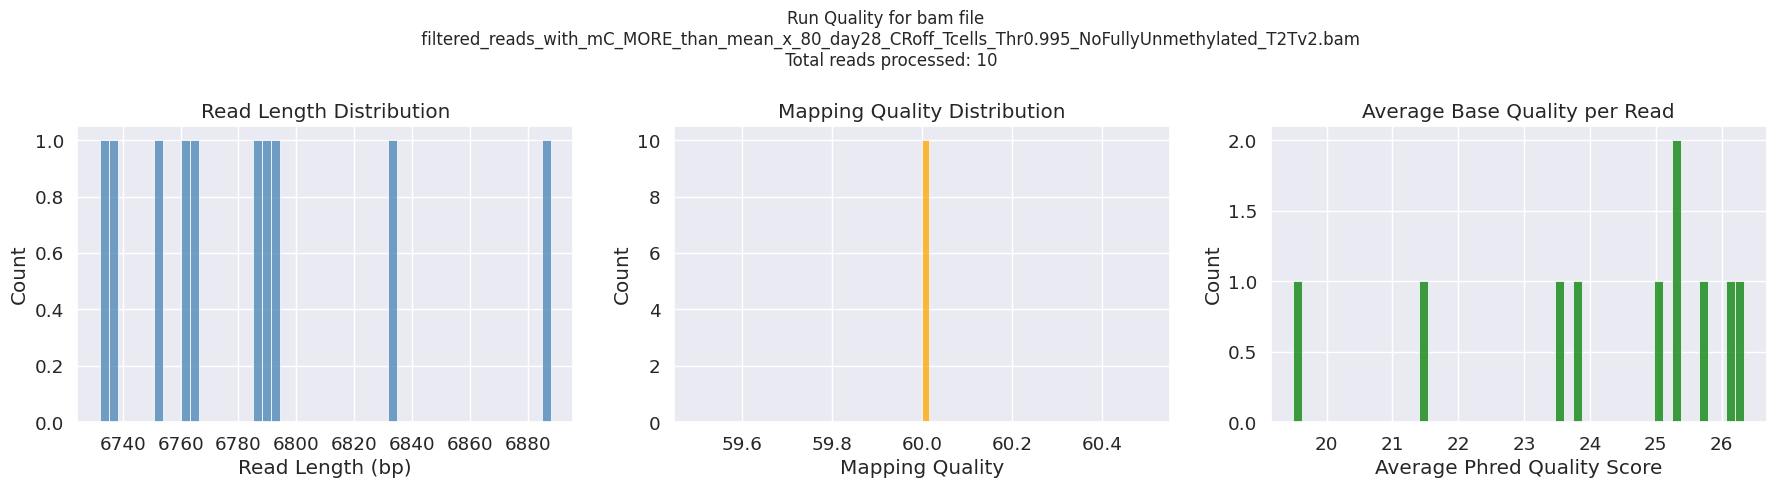

Total reads processed: 10


In [20]:
plot_bam_quality_metrics(filtered_output_bam_path)

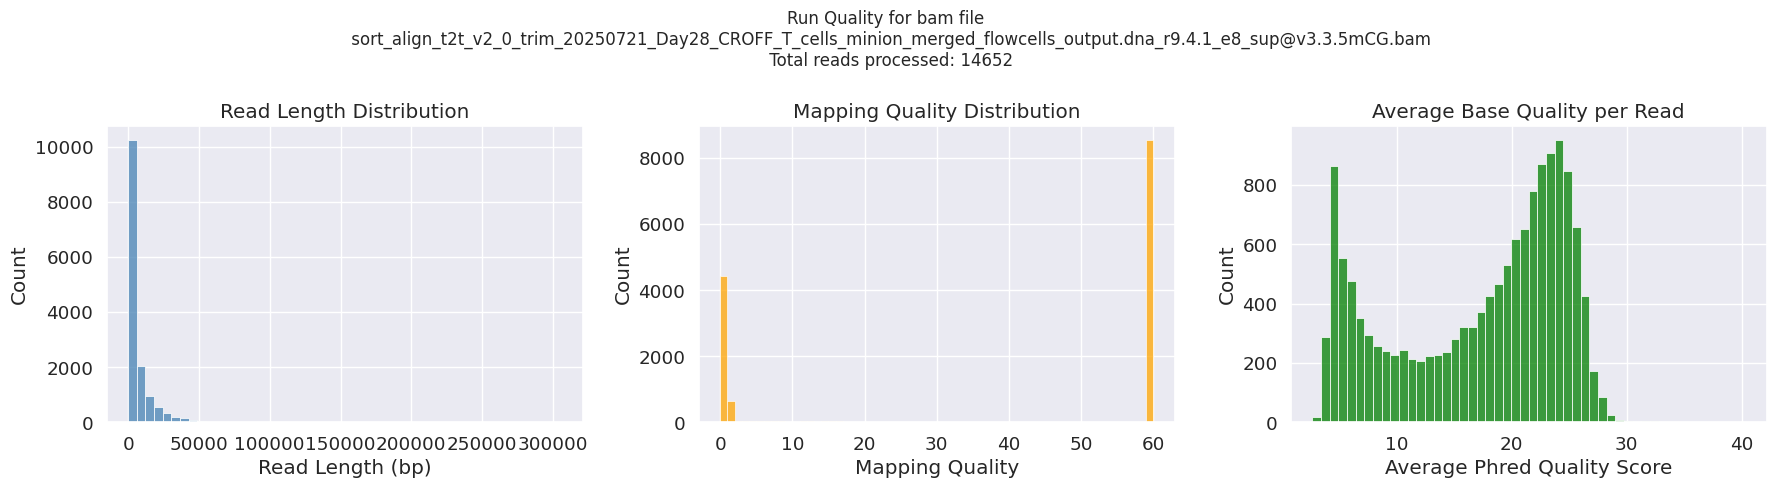

Total reads processed: 14652


In [21]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [22]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [23]:
region_str

'chr1:206583354-206589854'

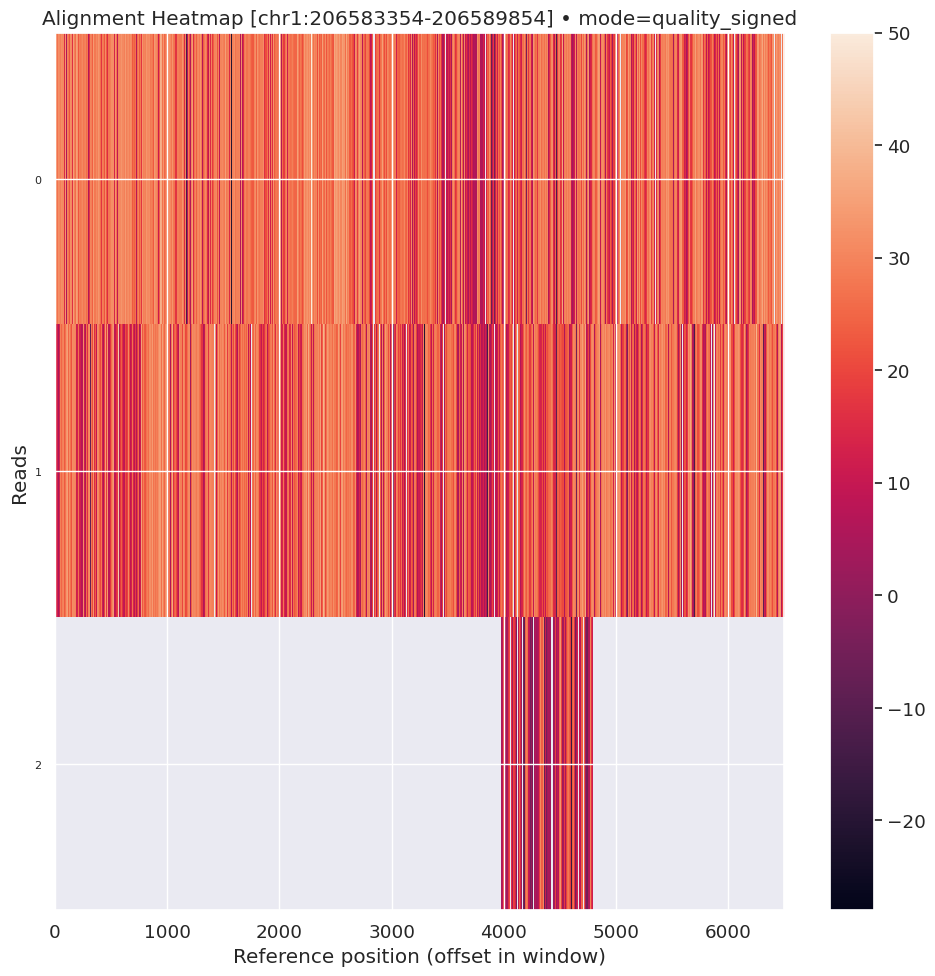

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



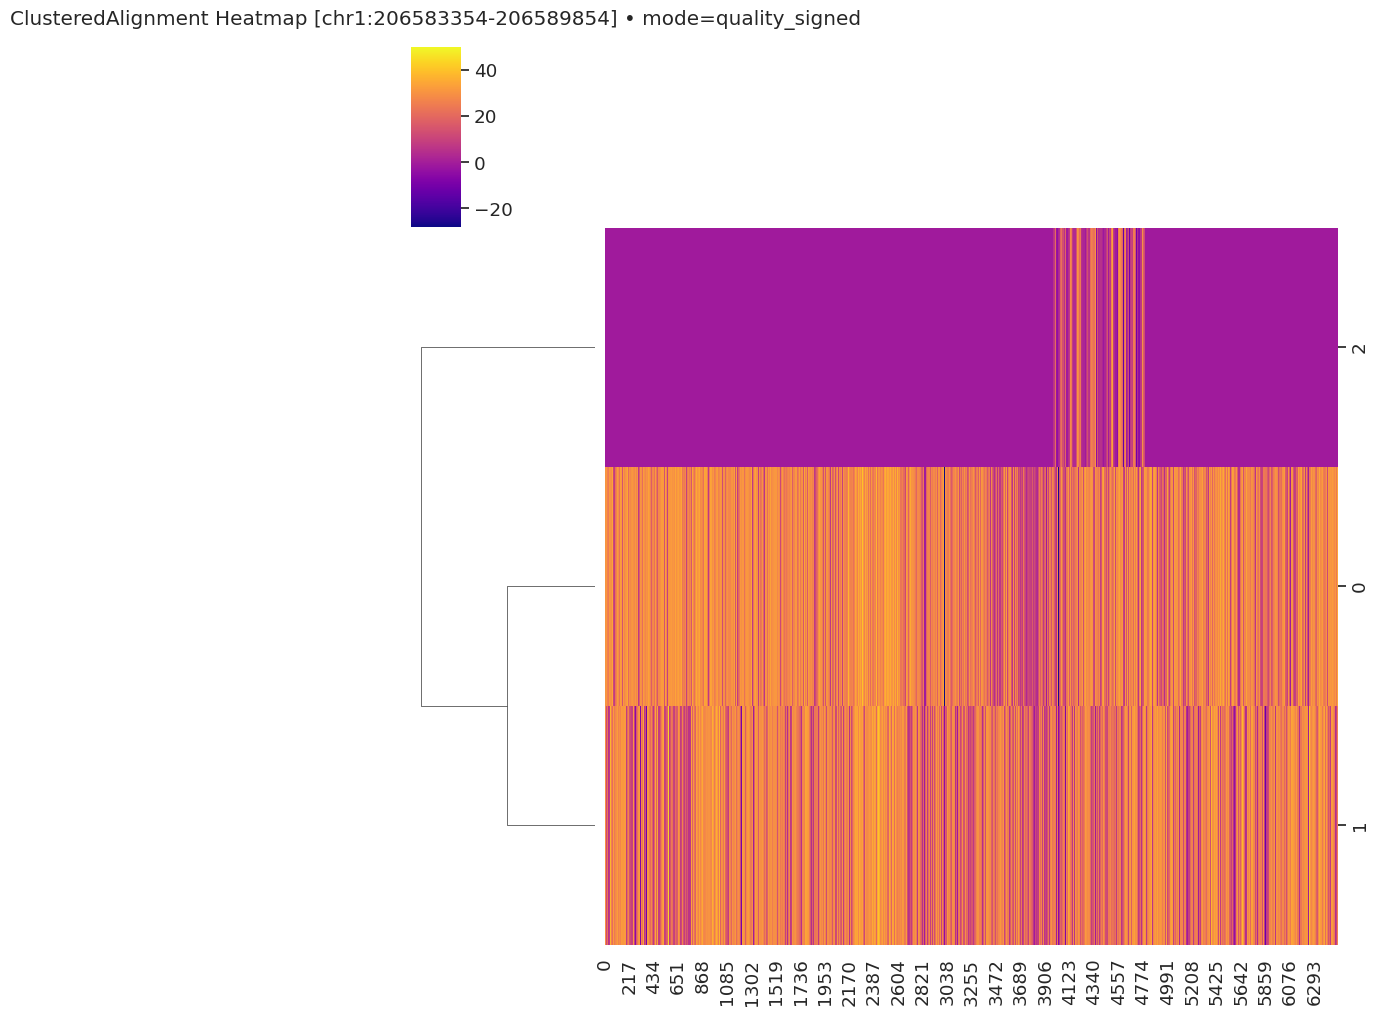

In [24]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

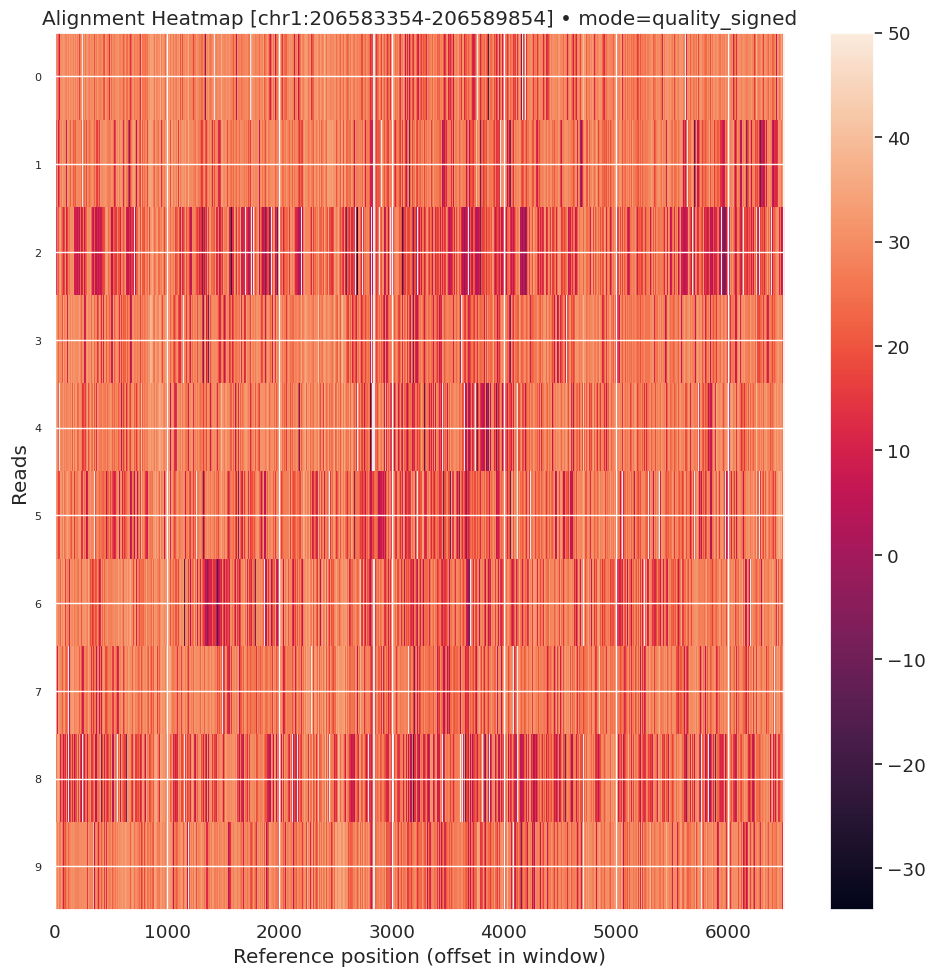

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



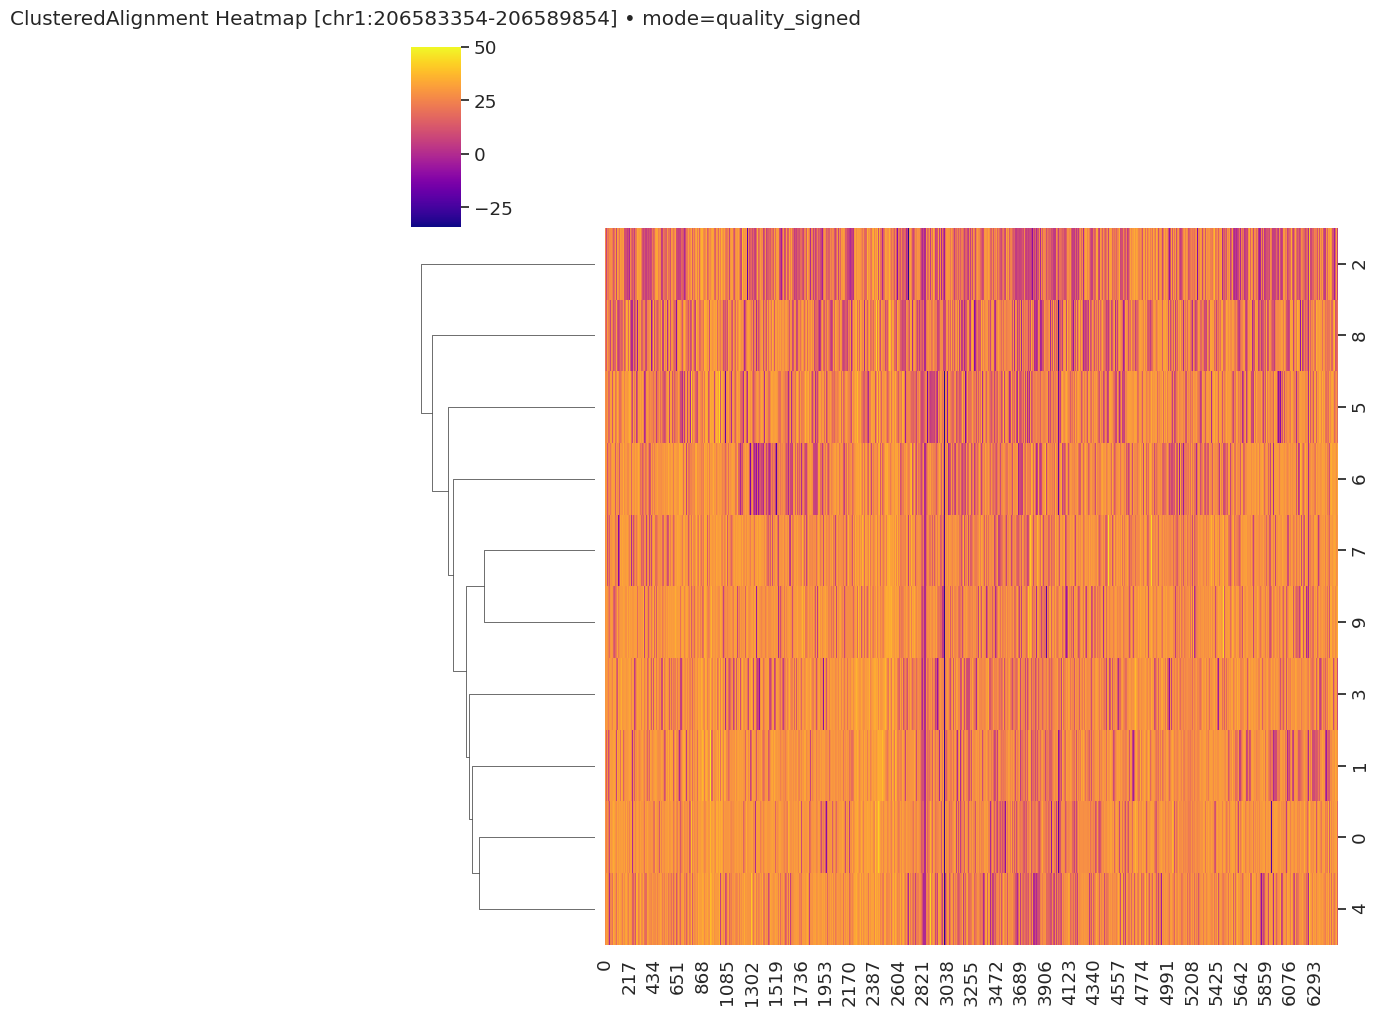

In [25]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



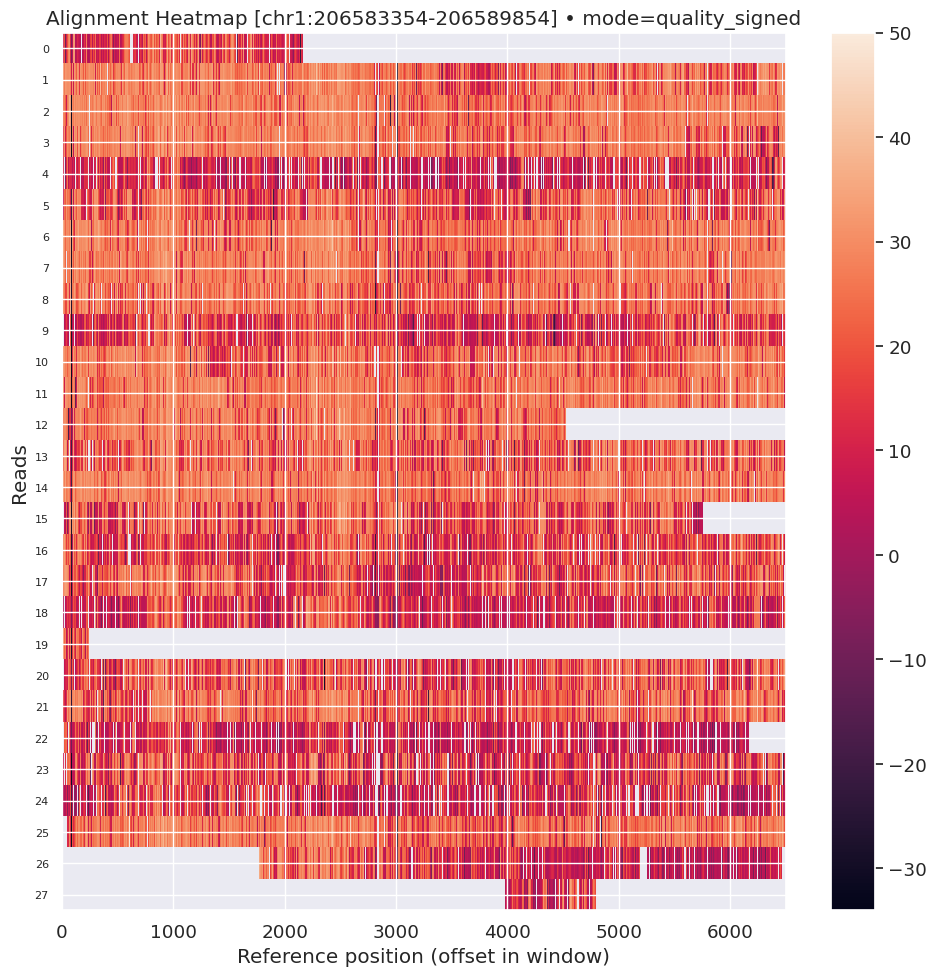

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



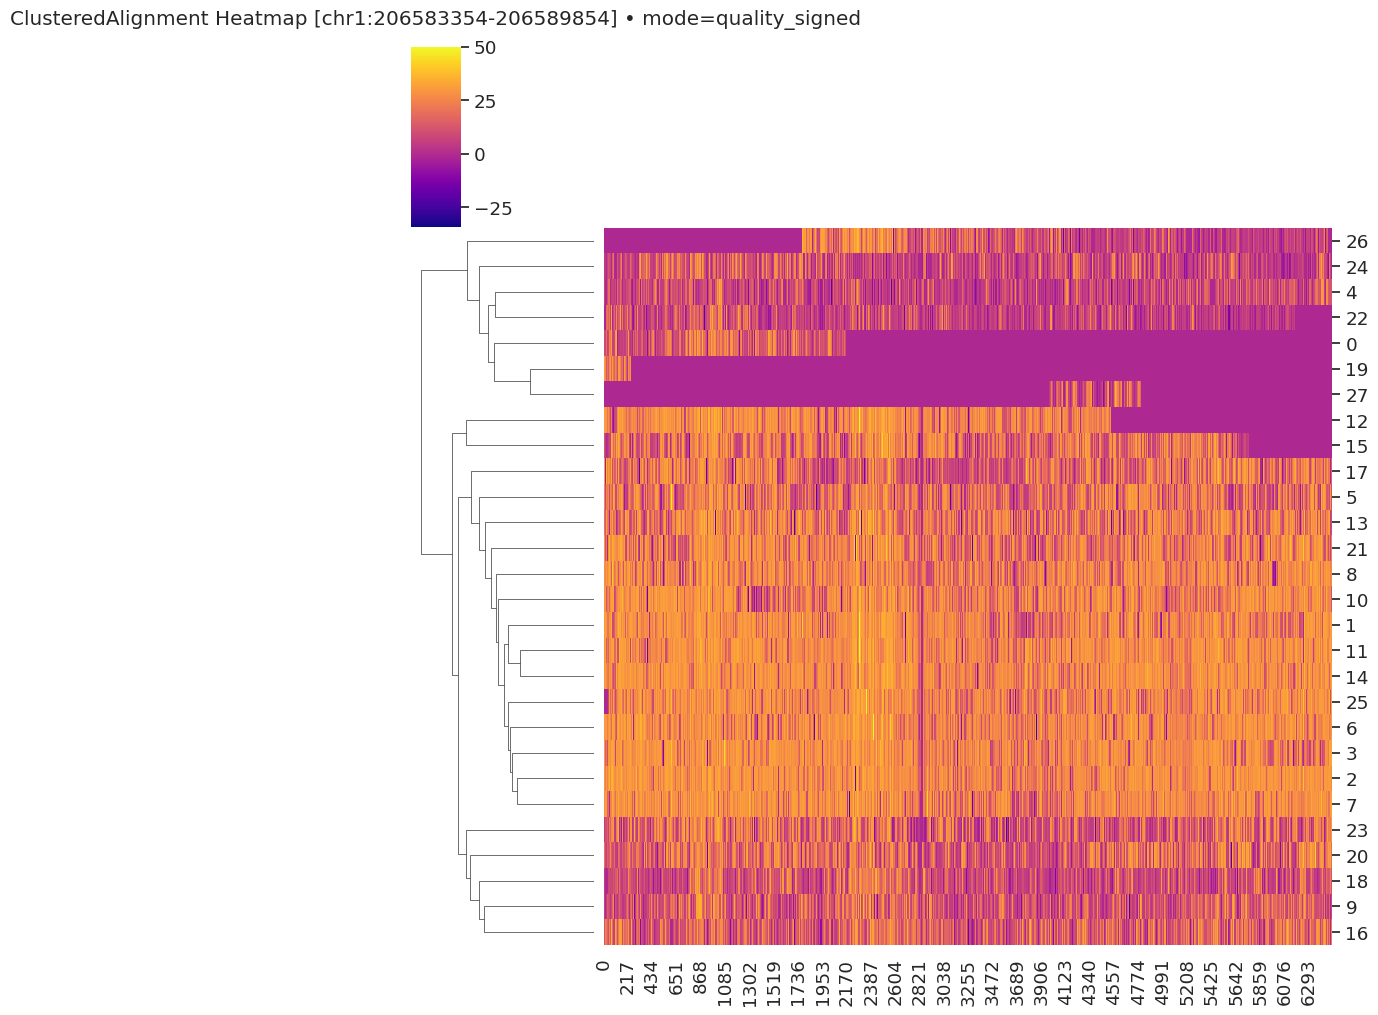

In [26]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = original_bam_path #  unedit_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)


# Get read #27 start and end coordinates:

In [ ]:
import pysam

bam_path = "/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
with pysam.AlignmentFile(bam_path, "rb") as bamfile:
    for i, read in enumerate(bamfile):
        if i == 0:
            print(f"Read 0: {read.query_name}, start: {read.reference_start}, end: {read.reference_end}")
        if i == 16:
            print(f"Read 16: {read.query_name}, start: {read.reference_start}, end: {read.reference_end}")
            
        if i == 27:
            print(f"Read 27: {read.query_name}, start: {read.reference_start}, end: {read.reference_end}")
            break


Read 0: 480da1c8-0f2e-4fd4-922f-3c9e4d058434, start: 51791, end: 62486
Read 16: f1afd653-3b6c-464a-84c9-4340cfa78efa, start: 2257538, end: 2264425
Read 27: d67195fa-1c2f-4354-864e-9f51788bf8ef, start: 3335363, end: 3338603


In [56]:

import pysam

bam_path = str(bam_path)  # Ensure bam_path is a string if it's a Path object

read_name = "a18a8888-b8f5-4be5-bd58-504a07241f92"

with pysam.AlignmentFile(bam_path, "rb") as bamfile:
    for i, read in enumerate(bamfile):
        if read.query_name == read_name:
            print(f"Read Index Number: {i}")
            print(f"Read name: {read.query_name}")
            print(f"Reference name: {bamfile.get_reference_name(read.reference_id)}")
            print(f"Start: {read.reference_start}")
            print(f"End: {read.reference_end}")
            print(f"Mapping quality:  {read.mapping_quality}")
            print(f"Is reverse: {read.is_reverse}")
            break

Read Index Number: 923
Read name: a18a8888-b8f5-4be5-bd58-504a07241f92
Reference name: chr1
Start: 206587329
End: 206588147
Mapping quality:  40
Is reverse: False


In [12]:
get_read_info_by_index(original_bam_path, 0)

Read 0: 480da1c8-0f2e-4fd4-922f-3c9e4d058434, start: 51791, end: 62486


In [17]:
get_read_info_by_name(original_bam_path, "a18a8888-b8f5-4be5-bd58-504a07241f92")

Read Index Number: 923
Read name: a18a8888-b8f5-4be5-bd58-504a07241f92
Reference name: chr1
Start: 206587329
End: 206588147
Mapping quality:  40
Is reverse: False


In [7]:
get_read_info_by_index(original_bam_path, 923)

Read Index Number: 923
Read name: a18a8888-b8f5-4be5-bd58-504a07241f92
Reference name: chr1
Start: 206587329
End: 206588147
Mapping quality:  40
Is reverse: False


In [54]:
206587329 - 206583354

3975

In [55]:
206589854 - 206588147

1707

In [ ]:

region_str

'chr1:206583354-206589854'

In [49]:
3335363 - 206583354

-203247991

# Threshold 10%*mean(mC in alll reads)

In [27]:
threshold_percent = 10
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

Mean methylated CGs per read: 33.0
Maximum methylated CGs per read: 74.0
Threshold (10% of max): 3.30
Original number of reads: 13
Number of reads after filtering: 13
Removed 0 reads


,read_name_str,read_name,read_id_number,mod,pos,pos_shifted,num_CG_methylated
0,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2897,353,1.0
1,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2500,750,1.0
2,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2332,918,1.0
3,26691903-e686-4670-a760-ad70b0f87b42,1,1,"CG,0",-2193,1057,1.0
4,c758517d-05c4-4357-8457-6526c65c72a0,2,2,"CG,0",-2897,353,1.0
...,...,...,...,...,...,...,...
839,a18a8888-b8f5-4be5-bd58-504a07241f92,27,27,"CG,0",454,3704,1.0
840,a18a8888-b8f5-4be5-bd58-504a07241f92,27,27,"CG,0",463,3713,1.0
841,a18a8888-b8f5-4be5-bd58-504a07241f92,27,27,"CG,0",1127,4377,1.0
842,a18a8888-b8f5-4be5-bd58-504a07241f92,27,27,"CG,0",1141,4391,1.0


In [28]:
remove_reads_df

,read_name_str,read_name,read_id_number,mod,pos,pos_shifted,num_CG_methylated


In [29]:
bam_path

'/home/michalula/data/cas9_nanopore/data/20250721_nCATs_Tcells_CROFF_Day28/mergered_outputs/5mCG/to_t2t_v2_0/sort_align_t2t_v2_0_trim_20250721_Day28_CROFF_T_cells_minion_merged_flowcells_output.dna_r9.4.1_e8_sup@v3.3.5mCG.bam'

In [30]:
!pwd

/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads


In [31]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [32]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


ValueError: remove_reads_df has no read names to subset.

# Save filtered reads to BAM

In [33]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [34]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


Subset BAM written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam
Index written to: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam.bai


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam')

In [35]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

Converted BAM → SAM: /home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam


PosixPath('/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/filtered_reads_with_mC_MORE_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.sam')

In [36]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [37]:

plot_bam_quality_metrics(removed_output_bam_path)

[E::hts_open_format] Failed to open file "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam`: No such file or directory

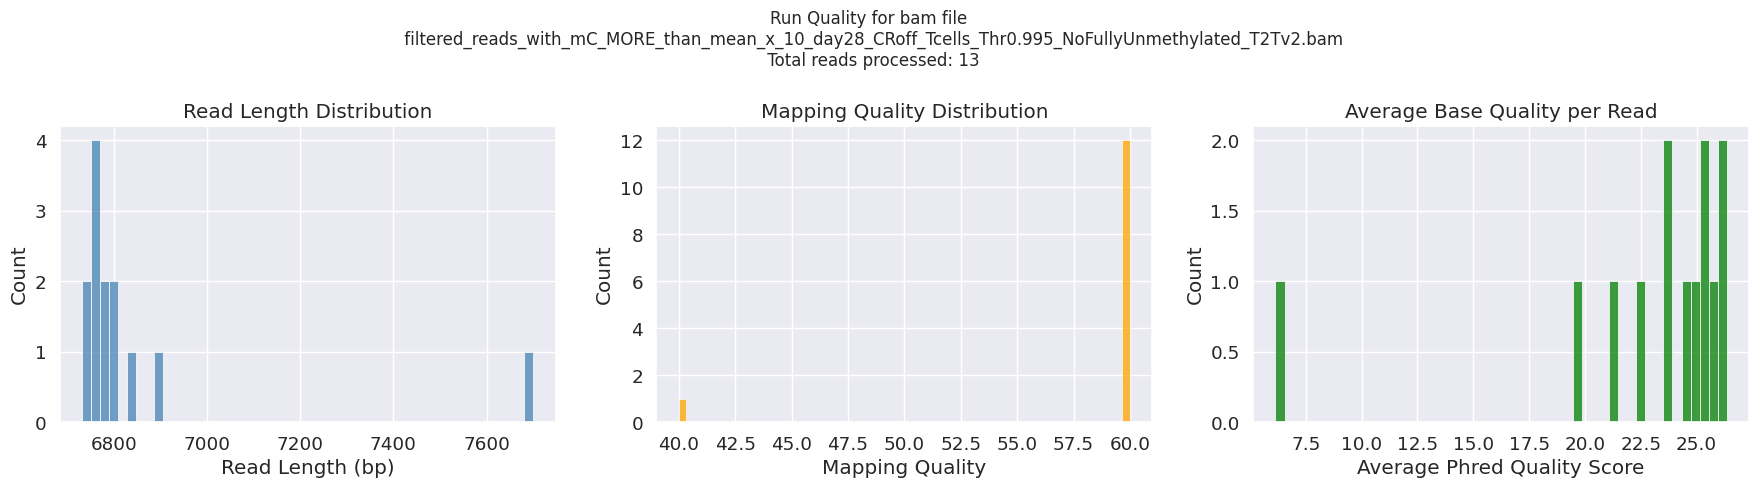

Total reads processed: 13


In [38]:
plot_bam_quality_metrics(filtered_output_bam_path)

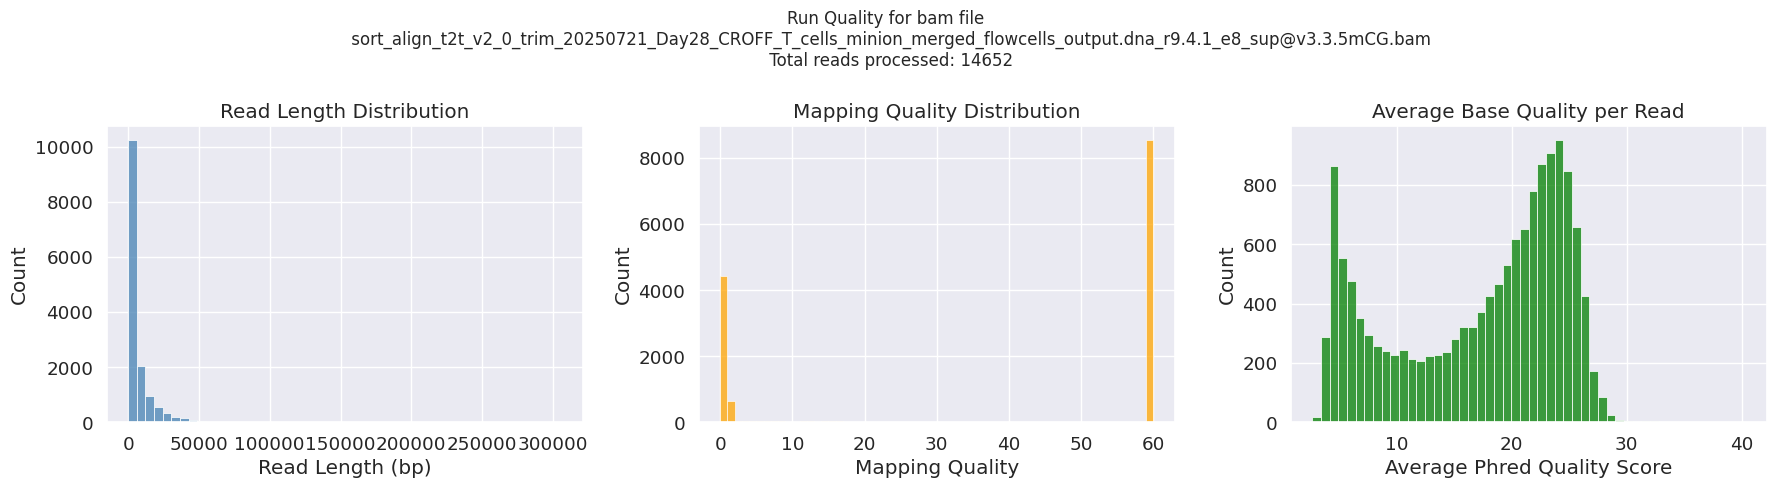

Total reads processed: 14652


In [39]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [40]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [41]:
region_str

'chr1:206583354-206589854'

In [42]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

[E::hts_open_format] Failed to open file "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/output/reads_with_mC_less_than_mean_x_10_day28_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2.bam`: No such file or directory

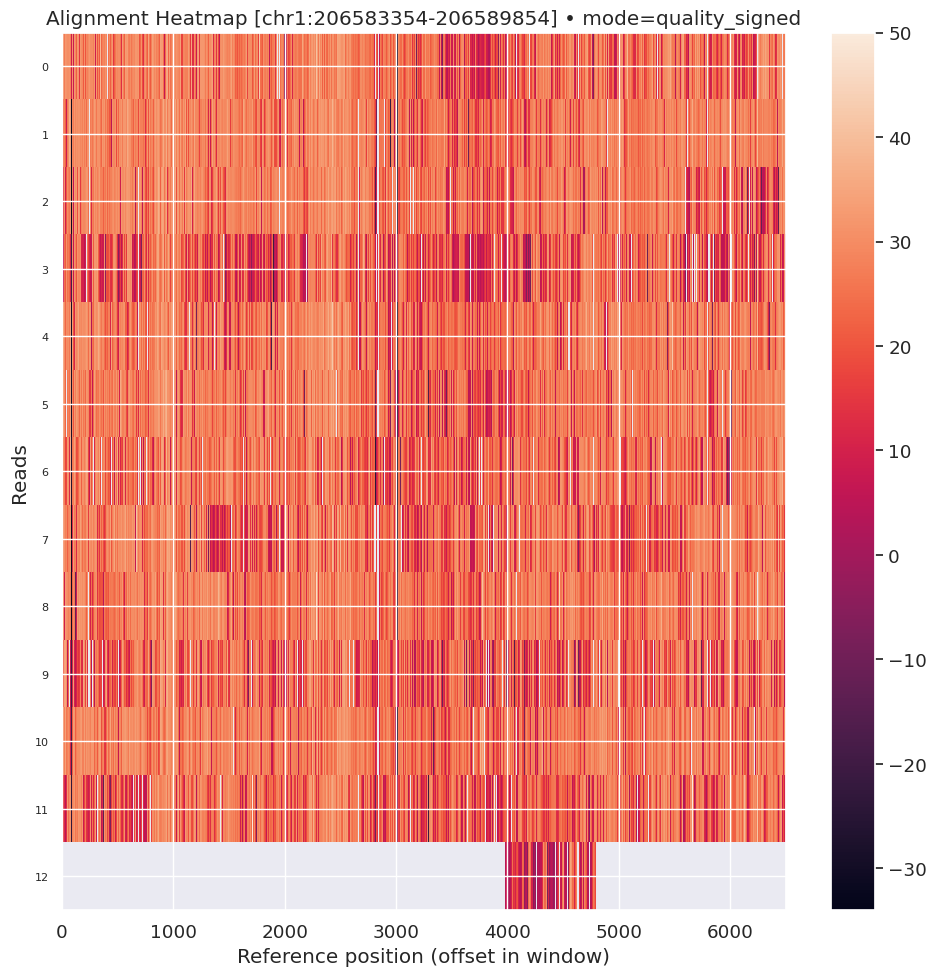

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



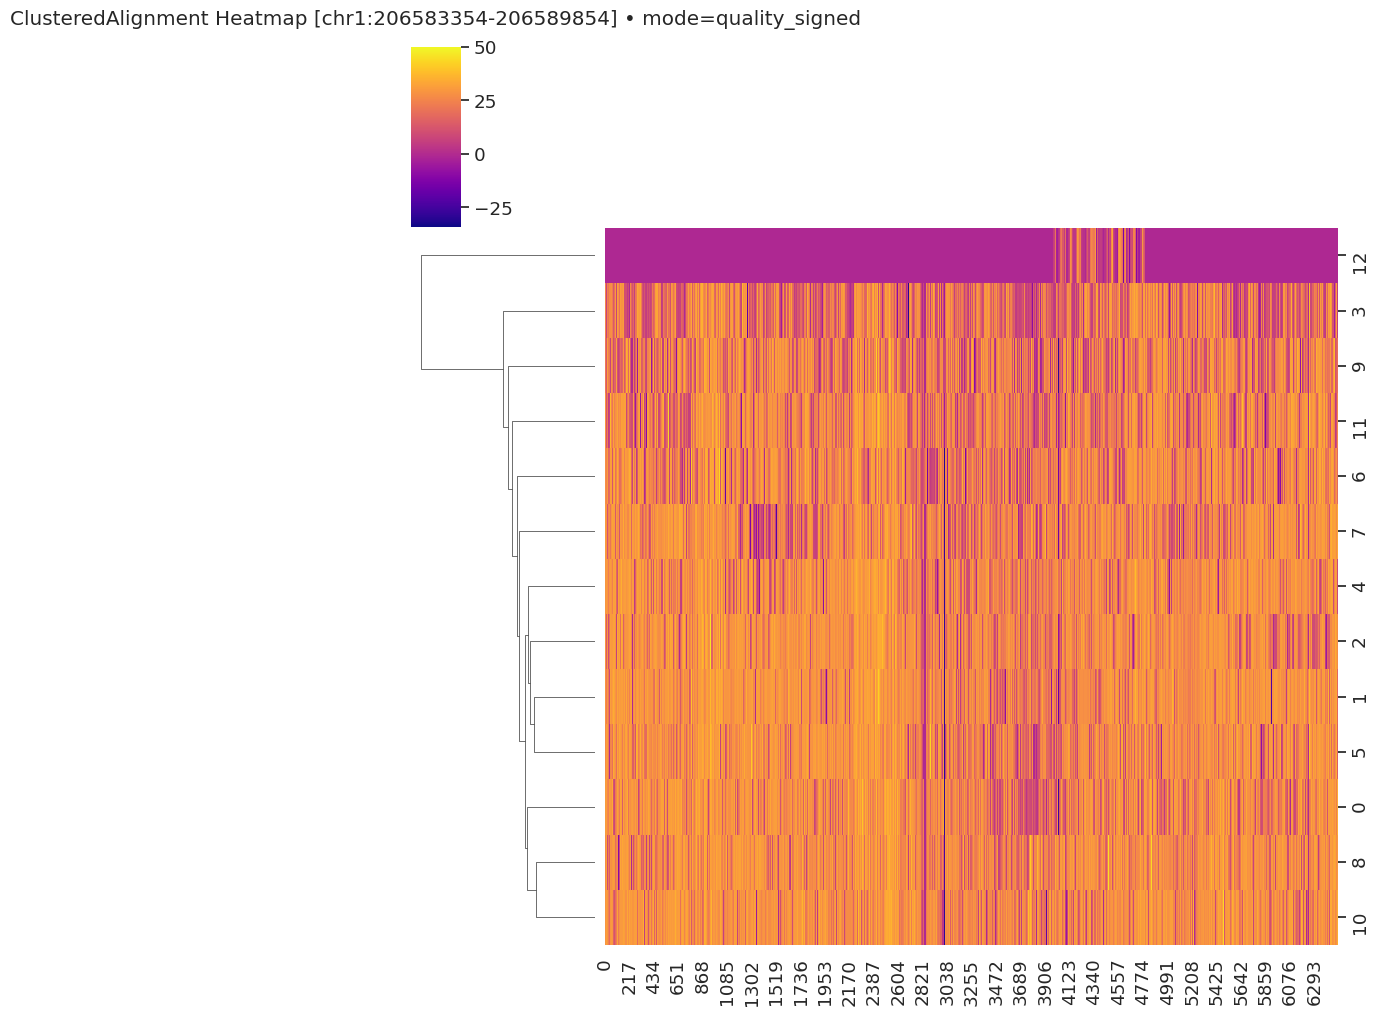

In [43]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



In [46]:
matrix

array([[ 7.,  7.,  7., ..., nan, nan, nan],
       [31., 31., 31., ..., 34., 30., 32.],
       [30., 29., 30., ..., 17., 17., 27.],
       ...,
       [nan, nan, nan, ..., 17., 18., 29.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [45]:
meta

{'read_names': ['66e0b8f0-e20d-4fe8-b8fb-3755683e5167',
  '26691903-e686-4670-a760-ad70b0f87b42',
  'c758517d-05c4-4357-8457-6526c65c72a0',
  '035da8dd-fe81-463d-ab71-f3868112d62a',
  'ec0296e6-f5d3-4209-8ef5-c677a5a240aa',
  'a177f8ff-555a-47a7-98b3-235c69dcc230',
  '960b12aa-160c-4d90-abd7-9a6d03a6a225',
  '158c6df5-c59b-4d5b-ba66-9f7333f60628',
  '81d9c9a4-e181-4d1b-a08e-b079b8c2d493',
  '196a1a95-9ebc-406d-a20d-c370d3d00dd8',
  '2d177852-83a1-4015-bd0e-15c09376d3e1',
  'c6ce1a02-47c1-419a-8689-9b25c7b6597b',
  '4571a190-f277-49cb-abed-83630bf1e7d7',
  'cf3b0d9a-dbb4-4d70-99f3-a2da9be46bcc',
  '57b38588-021d-4039-bce7-6a1324d97628',
  'efa9e0e4-703e-4729-baa6-c006358484ed',
  '21336473-111b-4310-84dc-500452649158',
  '697a7a83-47dd-4e9e-b472-d668f05c4f37',
  'ddbbdd14-6486-42aa-8b5e-87a5713d18fa',
  'c9200e4e-e9b2-4970-bcf1-c61600f3cead',
  'aeae711b-9209-4a64-ba15-da27152587b9',
  '30258949-6bba-40d0-a628-978b9f04ae14',
  'e4c83f62-594c-41b5-937e-87290576382d',
  '9e90d97f-44fa-452

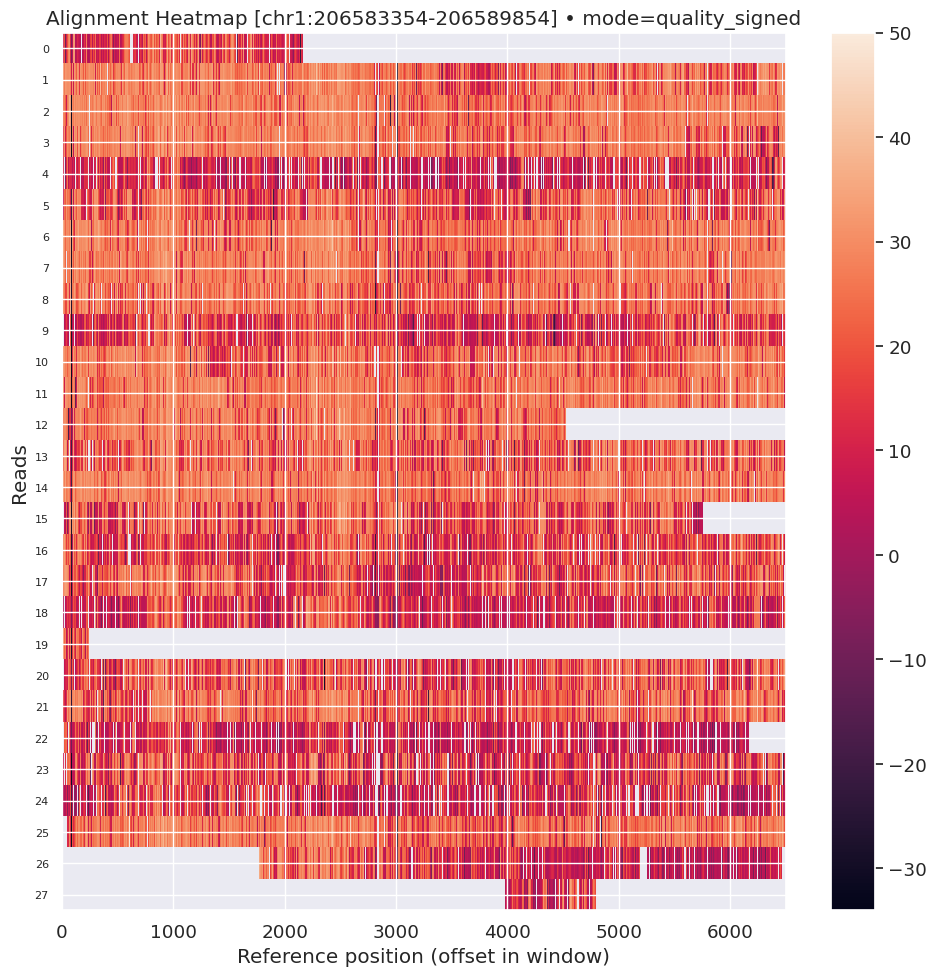

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



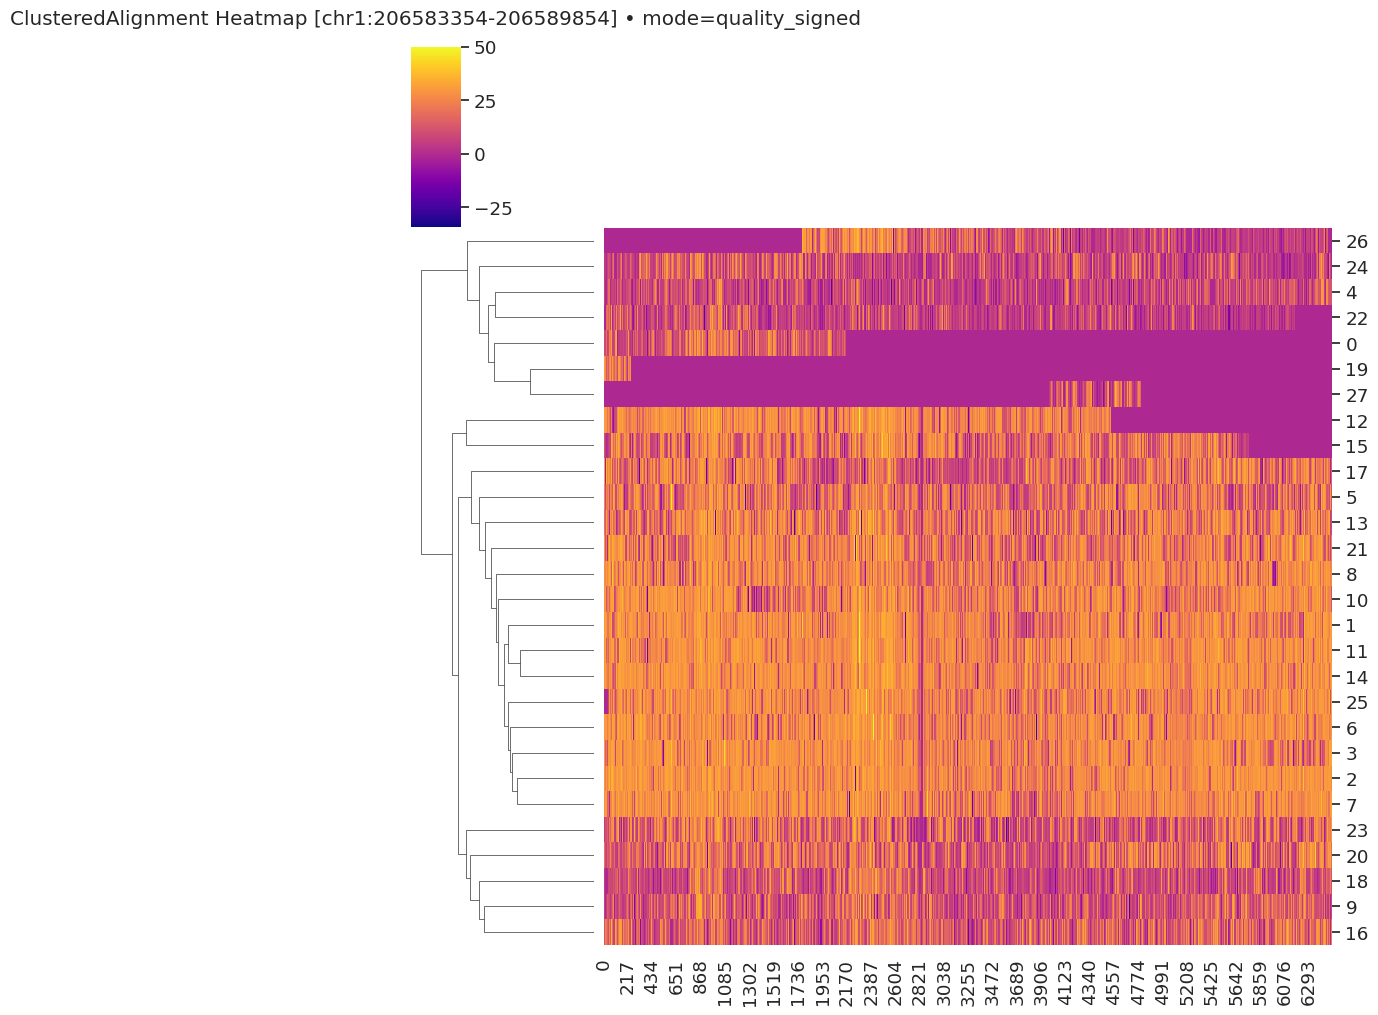

In [44]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = original_bam_path # unedit_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)


# Threshold 5%*mean(mC in alll reads)

In [ ]:
threshold_percent = 5
filtered_reads_df, methylation_counts, remove_reads_df = remove_low_methylated_reads(reads_df, threshold_percent=threshold_percent)
filtered_reads_df

In [ ]:
remove_reads_df

In [ ]:
bam_path

In [ ]:
!pwd

In [ ]:
# output_dir_path = '/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/' # "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/"
removed_reads_bam_name = "reads_with_mC_less_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
removed_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
removed_output_bam_path

In [ ]:
subset_BAM_by_read_IDs(original_bam_path, remove_reads_df, output_bam_path=removed_output_bam_path, index_output=True)


# Save filtered reads to BAM

In [ ]:
# output_dir_path = "/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/outputs"
removed_reads_bam_name = "filtered_reads_with_mC_MORE_than_mean_x_" +  str(threshold_percent) + "_" + experiment_name +".bam"
filtered_output_bam_path=Path(output_dir_path, removed_reads_bam_name)
filtered_output_bam_path

In [ ]:
subset_BAM_by_read_IDs(original_bam_path, filtered_reads_df, output_bam_path=filtered_output_bam_path, index_output=True)


In [ ]:
sam_path = bam_to_sam(filtered_output_bam_path, sam_path=None)
sam_path

In [ ]:
# sam_path = bam_to_sam(removed_output_bam_path, sam_path=None)
# sam_path
# removed_reads_bam_path = '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [ ]:

plot_bam_quality_metrics(removed_output_bam_path)

In [ ]:
plot_bam_quality_metrics(filtered_output_bam_path)

In [ ]:
plot_bam_quality_metrics(original_bam_path)

# Load BAM files

In [ ]:
# removed_reads_bam_path= '/home/michalula/code/epiCausality/epiCode/utils/development_notebooks/reads_with_mC_less_than_mean_x_50_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2.bam'
# removed_reads_bam_path
# plot_bam_quality_metrics(removed_reads_bam_path)

In [ ]:
region_str

In [ ]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams


bam = removed_output_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)

In [ ]:


sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = filtered_output_bam_path  #  removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)



In [ ]:
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))
import funcs_check_quality_bams

bam = original_bam_path # removed_reads_bam_path # "/path/to/your.bam"
ref_genome_path = Path('/home/michalula/data/ref_genomes/t2t_v2_0/up_chm13v2.0.fasta') # ref = "/path/to/reference.fa"  # must have .fai index

# region = "chr1:206586100-206586220"  # keep windows reasonably small

# Build matrix (limit to, say, 3000 reads to keep memory sane)
matrix, meta = funcs_check_quality_bams.build_alignment_heatmap(
    bam_path=bam,
    region=region_str, #region,
    reference_fasta=ref_genome_path,
    mode="quality_signed",   # try 'binary' for a simple match/mismatch view
    max_reads=3000,
    primary_only=True,
    min_mapq=0,
)

# Plot it
funcs_check_quality_bams.plot_alignment_heatmap(matrix, meta)

# (Optional) Save for later
np.save("alignment_heatmap.npy", matrix)
